In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud  # Corrected import for WordCloud
import nltk

# Download NLTK datasets and lexicons
nltk.download([
    'stopwords',
    'punkt',
    'wordnet',
    'omw-1.4',
    'vader_lexicon'
])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Import pandas
import pandas as pd

# Read the file
data = pd.read_csv("McDonald_s_Reviews.csv")


In [ ]:
data.shape

(33396, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
nullcounts = data.isnull().sum()
print(nullcounts)

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64


In [ ]:
print(data.head())

   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

In [ ]:
print(data.columns)

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')


In [ ]:
# Dropping multiple columns (with corrected column names)
columns_to_drop = ['category', 'latitude ', 'longitude', 'rating_count', 'review_time', 'rating']
data = data.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(data.head())


   reviewer_id  store_name                                      store_address  \
0            1  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   
1            2  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   
2            3  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   
3            4  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   
4            5  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   

                                              review  
0  Why does it look like someone spit on my food?...  
1  It'd McDonalds. It is what it is as far as the...  
2  Made a mobile order got to the speaker and che...  
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  
4  I repeat my order 3 times in the drive thru, a...  


In [ ]:
data.describe()

,reviewer_id
count,33396.000000
mean,16698.500000
std,9640.739131
min,1.000000
25%,8349.750000
50%,16698.500000
75%,25047.250000
max,33396.000000


In [ ]:

print(data.columns)

Index(['reviewer_id', 'store_name', 'store_address', 'review'], dtype='object')


In [ ]:
print(data.describe())

        reviewer_id
count  33396.000000
mean   16698.500000
std     9640.739131
min        1.000000
25%     8349.750000
50%    16698.500000
75%    25047.250000
max    33396.000000


In [ ]:
print(data.isnull().sum())

reviewer_id      0
store_name       0
store_address    0
review           0
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer_id    33396 non-null  int64 
 1   store_name     33396 non-null  object
 2   store_address  33396 non-null  object
 3   review         33396 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB
None


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sentiment = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the 'review' column
data['compound'] = [sentiment.polarity_scores(text)['compound'] for text in data['review']]
data['neg'] = [sentiment.polarity_scores(text)['neg'] for text in data['review']]
data['neu'] = [sentiment.polarity_scores(text)['neu'] for text in data['review']]
data['pos'] = [sentiment.polarity_scores(text)['pos'] for text in data['review']]

# Display the updated DataFrame
print(data.head())


   reviewer_id  store_name                                      store_address  \
0            1  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   
1            2  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   
2            3  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   
3            4  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   
4            5  McDonald's  13749 US-183 Hwy, Austin, TX 78750, United States   

                                              review  compound    neg    neu  \
0  Why does it look like someone spit on my food?...    0.5215  0.027  0.879   
1  It'd McDonalds. It is what it is as far as the...    0.8687  0.000  0.791   
2  Made a mobile order got to the speaker and che...   -0.3535  0.051  0.949   
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...    0.0000  0.000  1.000   
4  I repeat my order 3 times in the drive thru, a...   -0.8020  0.143  0.857   

     pos  
0  0.094  
1  0.209  

In [ ]:
data[['compound','neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,33396.000000,33396.000000,33396.000000,33396.000000
mean,0.144848,0.093842,0.632343,0.273663
std,0.523173,0.189864,0.329494,0.340888
min,-0.996400,0.000000,0.000000,0.000000
25%,-0.273200,0.000000,0.446750,0.000000
50%,0.202300,0.000000,0.729000,0.118000
75%,0.571900,0.118000,0.883000,0.444000
max,0.997300,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

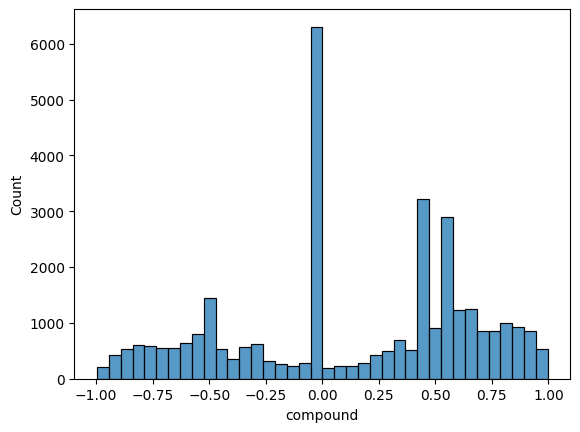

In [ ]:
sns.histplot(data['compound'])

<Axes: xlabel='neg', ylabel='Count'>

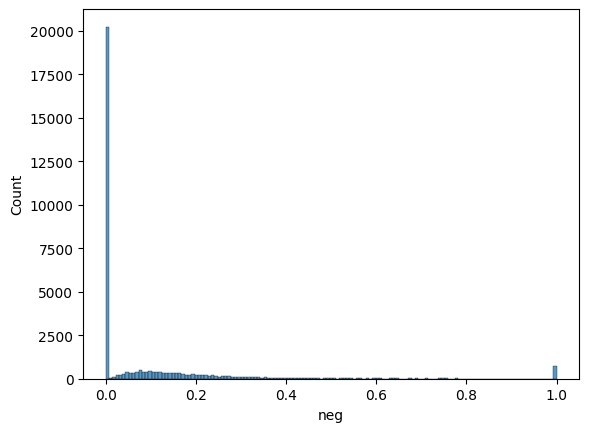

In [ ]:
sns.histplot(data['neg'])

<Axes: xlabel='neu', ylabel='Count'>

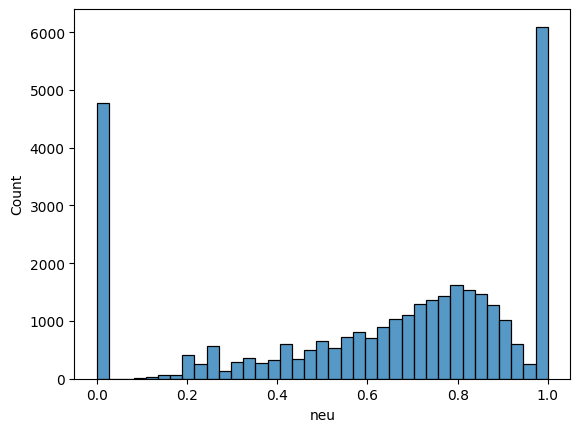

In [ ]:
sns.histplot(data['neu'])

<Axes: xlabel='pos', ylabel='Count'>

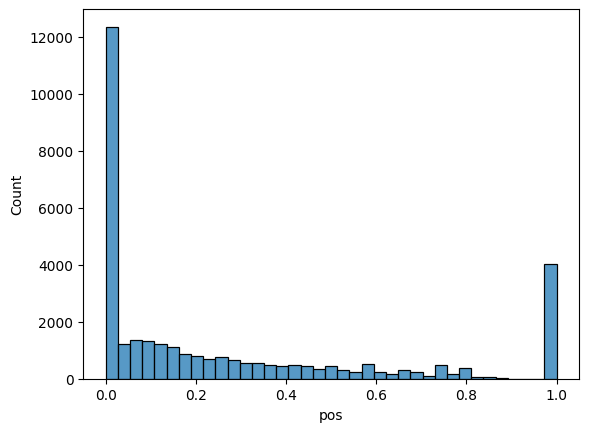

In [ ]:
sns.histplot(data['pos'])

In [ ]:
(data['compound'] < 0).groupby(data['store_address']).sum()


,compound
store_address,
"1044 US-11, Champlain, NY 12919, United States",153
"10451 Santa Monica Blvd, Los Angeles, CA 90025, United States",1
"10901 Riverside Dr, North Hollywood, CA 91602, United States",415
"1100 N US Hwy 377, Roanoke, TX 76262, United States",221
"111 Madison St, Oak Park, IL 60302, United States",161
"1121 Garnet Ave, San Diego, CA 92109, United States",211
"11382 US-441, Orlando, FL 32837, United States",198
"114 Delancey St, New York, NY 10002, United States",0
"13749 US-183 Hwy, Austin, TX 78750, United States",207


In [ ]:
percent_negative = pd.DataFrame(
    (data['compound'] <= 0).groupby(data['store_address']).sum()
    / data['store_address'].groupby(data['store_address']).count() * 100,
    columns=['% negative reviews']
).sort_values(by='% negative reviews')

# Display the result
percent_negative


,% negative reviews
store_address,
"114 Delancey St, New York, NY 10002, United States",0.000000
"160 Broadway, New York, NY 10038, United States",0.000000
"6875 Sand Lake Rd, Orlando, FL 32819, United States",24.693878
"555 13th St NW, Washington, DC 20004, United States",33.333333
"7010 Bradlick Shopping Center, Annandale, VA 22003, United States",36.544850
"5920 Balboa Ave, San Diego, CA 92111, United States",37.636364
"702-2 Haddonfield-Berlin Rd, Voorhees Township, NJ 08043, United States",37.645811
"1100 N US Hwy 377, Roanoke, TX 76262, United States",38.013699
"429 7th Ave, New York, NY 10001, United States",39.385965


<ipython-input-25-9e43d77d5c93>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


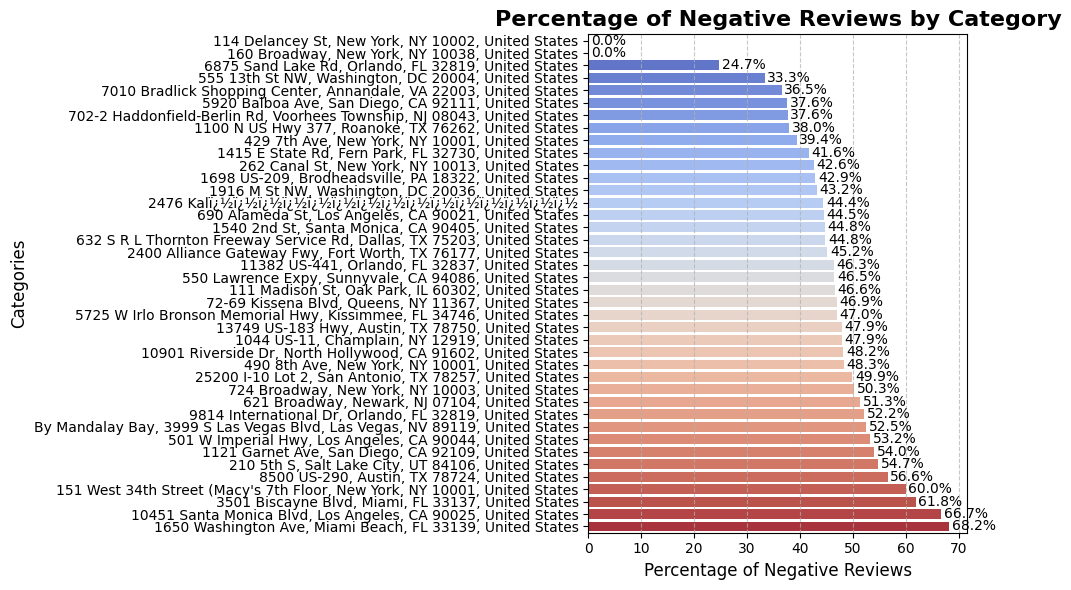

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=percent_negative,
    x='% negative reviews',
    y=percent_negative.index,
    palette="coolwarm"
)
plt.title('Percentage of Negative Reviews by Category', fontsize=16, weight='bold')
plt.xlabel('Percentage of Negative Reviews', fontsize=12)
plt.ylabel('Categories', fontsize=12)

# Adding data labels
for i, value in enumerate(percent_negative['% negative reviews']):
    plt.text(value + 0.5, i, f"{value:.1f}%", va='center', fontsize=10, color='black')

# Customizing the layout
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add light gridlines
plt.tight_layout()
plt.show()


In [ ]:
#1650 Washington Ave, Miami Beach, FL 33139, United States has the most negative reviews

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenizing the input text
    tokenized_documents = RegexpTokenizer(r'[a-zA-Z0-9]+').tokenize(text)

    # Cleaning tokens: converting to lowercase and removing stop words
    # Use the stopwords variable here
    cleaned_token = [word.lower() for word in tokenized_documents if word.lower() not in stopwords.words('english')]

    # Stemming the cleaned tokens
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_token]

    return stemmed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocess the 'review' text column for negative reviews
data['processed_negative_review'] = data['review'].apply(preprocess_text)

# Subset of negative reviews for the specific store address
data_negative_subset = data.loc[
    (data['store_address'] == '1650 Washington Ave, Miami Beach, FL 33139, United States') &
    (data['compound'] < 0)
]

# Display the first few rows of the negative reviews for that store
print(data_negative_subset.head())



       reviewer_id  store_name  \
10641        10642  McDonald's   
10643        10644  McDonald's   
10645        10646  McDonald's   
10646        10647  McDonald's   
10649        10650  McDonald's   

                                           store_address  \
10641  1650 Washington Ave, Miami Beach, FL 33139, Un...   
10643  1650 Washington Ave, Miami Beach, FL 33139, Un...   
10645  1650 Washington Ave, Miami Beach, FL 33139, Un...   
10646  1650 Washington Ave, Miami Beach, FL 33139, Un...   
10649  1650 Washington Ave, Miami Beach, FL 33139, Un...   

                                                  review  compound    neg  \
10641  Big Mac was cold. Tables, floor and whole rest...   -0.3891  0.085   
10643  Very poor customer service on the part of the ...   -0.8506  0.200   
10645  Food was ok.\nFor service I would give 0 stars...   -0.1145  0.079   
10646  Such a disorganized messï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...   -0.0516  0.084   
10649  The problem I have with this location is t

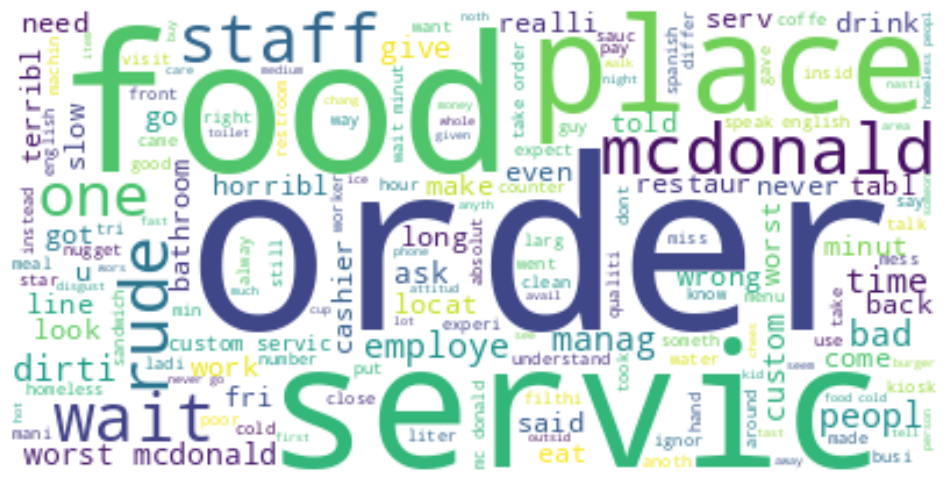

In [ ]:
# WordCloud of words from negative reviews by product
neg_tokens = [word for review in data_negative_subset['processed_negative_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(neg_tokens)
)

# Display the generated image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk.probability import FreqDist
neg_freq = FreqDist(neg_tokens)
neg_freq.tabulate(10)

   order   servic     food mcdonald    place    worst     ever     wait   custom     rude 
     200      128      127      121       95       86       82       79       67       67 


<Axes: xlabel='Samples', ylabel='Counts'>

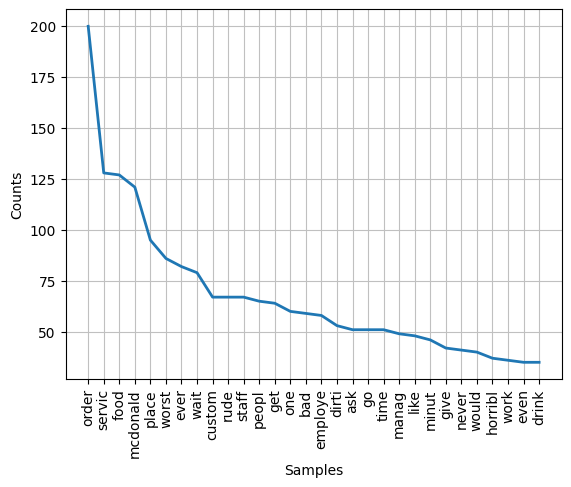

In [ ]:
neg_freq.plot(30)

Now For Postive Compund Value,

In [ ]:
(data['compound'] > 0).groupby(data['store_address']).sum()

,compound
store_address,
"1044 US-11, Champlain, NY 12919, United States",323
"10451 Santa Monica Blvd, Los Angeles, CA 90025, United States",1
"10901 Riverside Dr, North Hollywood, CA 91602, United States",886
"1100 N US Hwy 377, Roanoke, TX 76262, United States",724
"111 Madison St, Oak Park, IL 60302, United States",401
"1121 Garnet Ave, San Diego, CA 92109, United States",313
"11382 US-441, Orlando, FL 32837, United States",381
"114 Delancey St, New York, NY 10002, United States",3
"13749 US-183 Hwy, Austin, TX 78750, United States",417


In [ ]:
percent_positive = pd.DataFrame(
    (data['compound'] >= 0).groupby(data['store_address']).sum()
    / data['store_address'].groupby(data['store_address']).count() * 100,
    columns=['% positive_reviews']  # Name the column
).sort_values(by='% positive_reviews')

# Display the result
percent_positive


,% positive_reviews
store_address,
"1650 Washington Ave, Miami Beach, FL 33139, United States",41.403509
"151 West 34th Street (Macy's 7th Floor, New York, NY 10001, United States",53.333333
"9814 International Dr, Orlando, FL 32819, United States",58.201058
"3501 Biscayne Blvd, Miami, FL 33137, United States",58.535032
"210 5th S, Salt Lake City, UT 84106, United States",59.213483
"501 W Imperial Hwy, Los Angeles, CA 90044, United States",60.914761
"8500 US-290, Austin, TX 78724, United States",62.203024
"490 8th Ave, New York, NY 10001, United States",65.287356
"5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States",65.406977


<ipython-input-34-11de9f560543>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


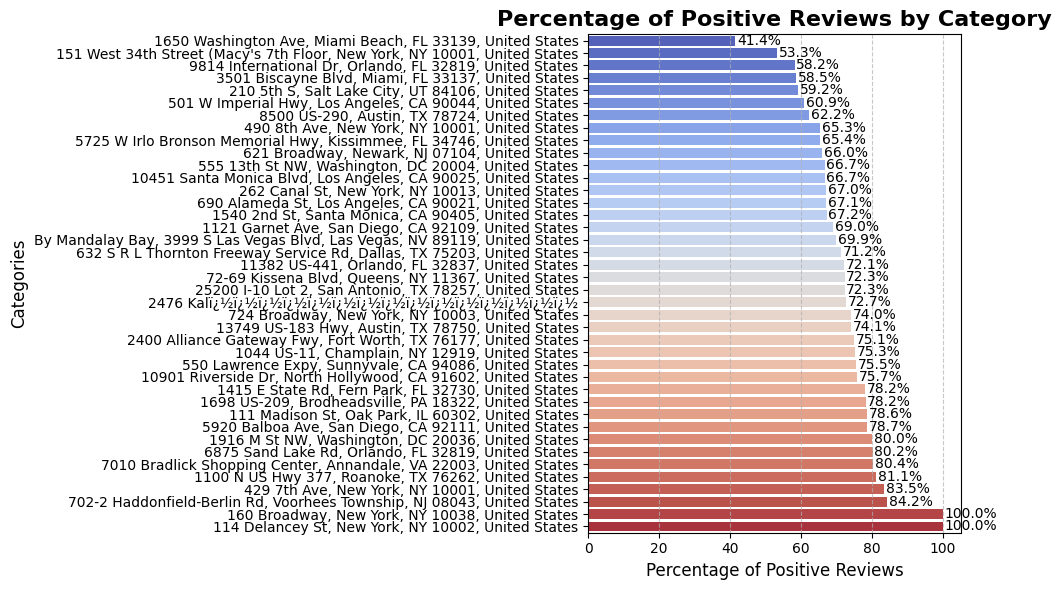

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

percent_positive = pd.DataFrame(
    (data['compound'] >= 0).groupby(data['store_address']).sum()
    / data['store_address'].groupby(data['store_address']).count() * 100,
    columns=['% positive reviews']
).sort_values(by='% positive reviews')
plt.figure(figsize=(10, 6))
sns.barplot(
    data=percent_positive,
    x='% positive reviews',
    y=percent_positive.index,
    palette="coolwarm"
)
plt.title('Percentage of Positive Reviews by Category', fontsize=16, weight='bold')
plt.xlabel('Percentage of Positive Reviews', fontsize=12)
plt.ylabel('Categories', fontsize=12)

for i, value in enumerate(percent_positive['% positive reviews']): # Use percent_positive DataFrame
    plt.text(value + 0.5, i, f"{value:.1f}%", va='center', fontsize=10, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add light gridlines
plt.tight_layout()
plt.show()

In [ ]:
#114 Delancey St, New York, NY 10002, United States and 160 Broadway, New York, NY 10038, United States have the most positive reviews and zero negative reviews

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenizing the input text
    tokenized_documents = RegexpTokenizer(r'[a-zA-Z0-9]+').tokenize(text)

    # Cleaning tokens: converting to lowercase and removing stop words
    # Use the stopwords variable here
    cleaned_token = [word.lower() for word in tokenized_documents if word.lower() not in stopwords.words('english')]

    # Stemming the cleaned tokens
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_token]

    return stemmed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


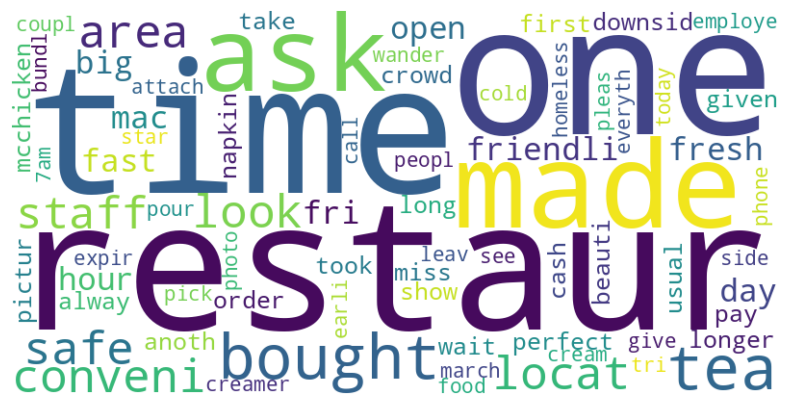

      reviewer_id  store_name  \
5248         5249  McDonald's   
5249         5250  McDonald's   
5250         5251  McDonald's   

                                        store_address  \
5248  160 Broadway, New York, NY 10038, United States   
5249  160 Broadway, New York, NY 10038, United States   
5250  160 Broadway, New York, NY 10038, United States   

                                                 review  compound    neg  \
5248  Very convenient location, area looks safe. The...    0.9080  0.000   
5249  Order took longer than usual, and was missing ...    0.3182  0.050   
5250  I bought a tea today March 13,2023 at 7am and ...    0.0258  0.046   

        neu    pos                          processed_negative_review  \
5248  0.768  0.232  [conveni, locat, area, look, safe, staff, frie...   
5249  0.896  0.054  [order, took, longer, usual, miss, mcchicken, ...   
5250  0.905  0.048  [bought, tea, today, march, 13, 2023, 7am, ask...   

                                       p

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocess the 'review' text column for positive reviews
data['processed_review'] = data['review'].apply(preprocess_text)

# Subset of positive reviews for the specific store address
data_positive_subset = data.loc[
    (data['store_address'] == '160 Broadway, New York, NY 10038, United States') &
    (data['compound'] > 0)  # Select positive reviews
]

# Combine all the processed reviews into a single text string
all_reviews = " ".join([" ".join(review) for review in data_positive_subset['processed_review']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the first few rows of the positive reviews for that store
print(data_positive_subset.head())


In [ ]:

from nltk.probability import FreqDist
pos_tokens = [word for review in data_positive_subset['processed_review'] for word in review]
pos_freq = FreqDist(pos_tokens)

pos_freq.tabulate(10)

restaur    time     one    made    also     ask  bought     tea conveni   locat 
      2       2       2       2       2       2       2       2       1       1 


<Axes: xlabel='Samples', ylabel='Counts'>

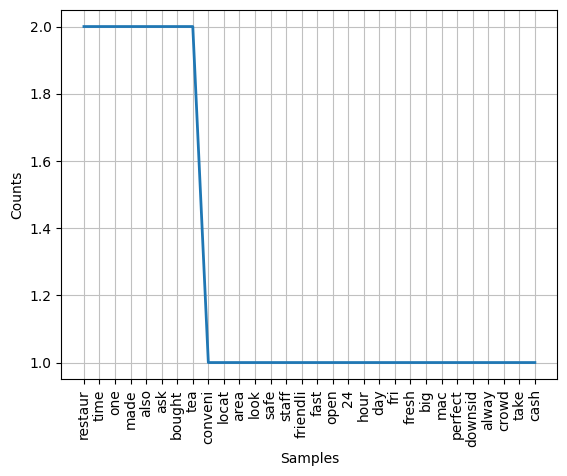

In [ ]:
pos_freq.plot(30)

In [ ]:
#Now For Text Classification

In [ ]:
# Read the file
data_1 = pd.read_csv("McDonald_s_Reviews.csv")

In [ ]:
print(data_1.columns)

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')


In [ ]:
# Dropping multiple columns (with corrected column names)
columns_to_drop = ['reviewer_id','store_name' , 'category','store_address', 'latitude ', 'longitude', 'rating_count', 'review_time']
data_1 = data_1.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(data_1.head())


                                              review   rating
0  Why does it look like someone spit on my food?...   1 star
1  It'd McDonalds. It is what it is as far as the...  4 stars
2  Made a mobile order got to the speaker and che...   1 star
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars
4  I repeat my order 3 times in the drive thru, a...   1 star


In [ ]:
# Create a new column 'sentiment' based on the 'rating' column
data_1['sentiment'] = data_1['rating'].apply(
    lambda x: 'Negative' if x in ['1 star', '2 stars']
    else 'Neutral' if x == '3 stars'
    else 'Positive'
)
print(data_1)

                                                  review   rating sentiment
0      Why does it look like someone spit on my food?...   1 star  Negative
1      It'd McDonalds. It is what it is as far as the...  4 stars  Positive
2      Made a mobile order got to the speaker and che...   1 star  Negative
3      My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars  Positive
4      I repeat my order 3 times in the drive thru, a...   1 star  Negative
...                                                  ...      ...       ...
33391                        They treated me very badly.   1 star  Negative
33392                           The service is very good  5 stars  Positive
33393                         To remove hunger is enough  4 stars  Positive
33394  It's good, but lately it has become very expen...  5 stars  Positive
33395                          they took good care of me  5 stars  Positive

[33396 rows x 3 columns]


In [ ]:
columns_to_drop = ['rating']
data_1 = data_1.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(data_1.head())


                                              review sentiment
0  Why does it look like someone spit on my food?...  Negative
1  It'd McDonalds. It is what it is as far as the...  Positive
2  Made a mobile order got to the speaker and che...  Negative
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  Positive
4  I repeat my order 3 times in the drive thru, a...  Negative


In [ ]:
# Assign column names
data_1.columns = ["Text", "Target_label"]
print(data_1.head())

                                                Text Target_label
0  look like someon spit food normal transact eve...     Negative
1  mcdonald far food atmospher go staff make diff...     Positive
2  made mobil order got speaker check line move l...     Negative
3   mc crispi chicken sandwich custom servic quick p     Positive
4  repeat order 3 time drive thru still manag mes...     Negative


In [ ]:
data_1.groupby('Target_label').count()

,Text
Target_label,
Negative,12517
Neutral,4818
Positive,16061


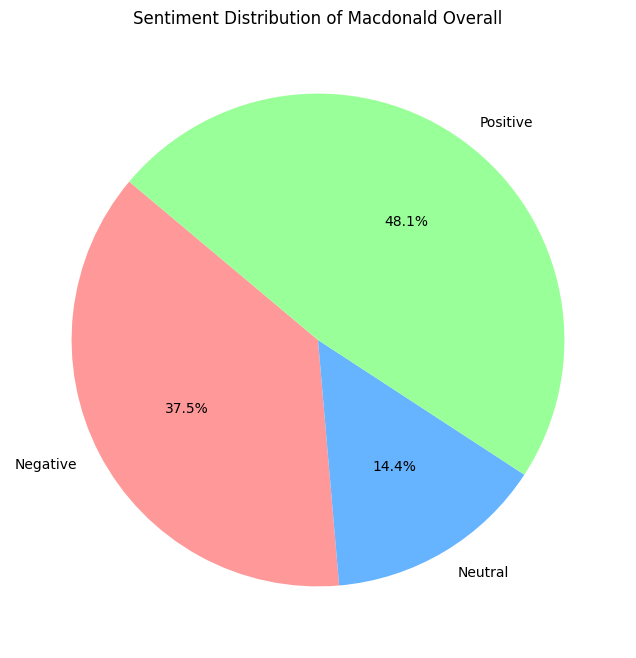

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = {
    'Negative': 12517,
    'Neutral': 4818,
    'Positive': 16061
}

# Extract labels and values
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999', '#66b3ff', '#99ff99']
)
plt.title('Sentiment Distribution of Macdonald Overall')
plt.show()


In [ ]:
#class label is imbalance so I will have to apply class imbalane

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenizing the input text
    tokenized_documents = RegexpTokenizer(r'[a-zA-Z0-9]+').tokenize(text)

    # Cleaning tokens: converting to lowercase and removing stop words
    # Use the stopwords variable here
    cleaned_token = [word.lower() for word in tokenized_documents if word.lower() not in stopwords.words('english')]

    # Stemming the cleaned tokens
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_token]

    return stemmed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_1['Text'] = data_1['Text'].apply(preprocess_text)
data_1.head()

,Text,Target_label
0,"[look, like, someon, spit, food, normal, trans...",Negative
1,"[mcdonald, far, food, atmospher, go, staff, ma...",Positive
2,"[made, mobil, order, got, speaker, check, line...",Negative
3,"[mc, crispi, chicken, sandwich, custom, servic...",Positive
4,"[repeat, order, 3, time, drive, thru, still, m...",Negative


In [ ]:
data_1['Text'] = data_1['Text'].apply(
    lambda x: " ".join(x) if isinstance(x, list) else str(x)
)

# Recheck the column format
print(data_1['Text'].head())

0    look like someon spit food normal transact eve...
1    mcdonald far food atmospher go staff make diff...
2    made mobil order got speaker check line move l...
3     mc crispi chicken sandwich custom servic quick p
4    repeat order 3 time drive thru still manag mes...
Name: Text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(data_1['Text'])

# Convert the sparse matrix to a DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the DataFrame
print(X_df.head())


   00  000  0000000  00am  00pm  01  0130  01am  02  03  ...  yummm  yummmm  \
0   0    0        0     0     0   0     0     0   0   0  ...      0       0   
1   0    0        0     0     0   0     0     0   0   0  ...      0       0   
2   0    0        0     0     0   0     0     0   0   0  ...      0       0   
3   0    0        0     0     0   0     0     0   0   0  ...      0       0   
4   0    0        0     0     0   0     0     0   0   0  ...      0       0   

   yup  yvett  zacharin  zari  zero  zombi  zone  zoo  
0    0      0         0     0     0      0     0    0  
1    0      0         0     0     0      0     0    0  
2    0      0         0     0     0      0     0    0  
3    0      0         0     0     0      0     0    0  
4    0      0         0     0     0      0     0    0  

[5 rows x 9933 columns]


In [ ]:
from sklearn.model_selection import train_test_split
y =  data_1['Target_label']
X_train, X_test , y_train , y_test = train_test_split(X,y , train_size = 0.8 , random_state= 99)

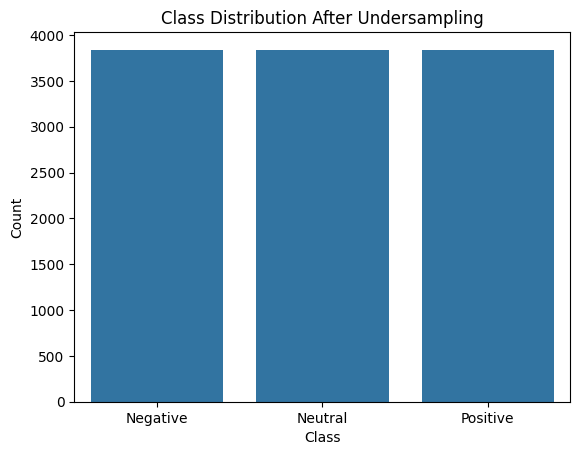

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the resampler
resampler = RandomUnderSampler(random_state=0)

# Perform undersampling
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

# Visualize the class distribution
sns.countplot(x=y_train_undersampled)
plt.title("Class Distribution After Undersampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)
MultinomialNB()

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)

In [ ]:
acc

0.7586826347305389

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Metrix :" )
print(cm)

Confusion Metrix :
[[2084  333  115]
 [ 232  539  207]
 [ 265  460 2445]]


In [ ]:
result = metrics.classification_report(y_test,y_pred)
print("Classification Report :" )
print(result)

Classification Report :
              precision    recall  f1-score   support

    Negative       0.81      0.82      0.82      2532
     Neutral       0.40      0.55      0.47       978
    Positive       0.88      0.77      0.82      3170

    accuracy                           0.76      6680
   macro avg       0.70      0.72      0.70      6680
weighted avg       0.78      0.76      0.77      6680

